<a href="https://colab.research.google.com/github/Jowindany/machine_learning_project_jowin/blob/main/heart_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

In [ ]:
data_set=pd.read_csv("/content/heart_disease_data.csv")

In [ ]:
data_set.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
data_set.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [ ]:
data_set.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
data_set.shape

(303, 14)

In [ ]:
data_set.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
data_set.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


In [ ]:
data_set['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

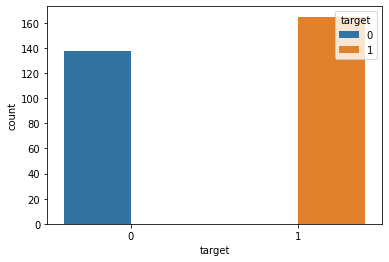

In [ ]:
sns.countplot(data=data_set, x='target',hue='target')

In [ ]:
x=data_set.drop(columns=['target'],axis=1)
y=data_set['target']

In [ ]:
print(x)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  
0        0   0     1  
1        0   0     2  
2        2   0    

In [ ]:
print(y)

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64


In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2,stratify=y)

In [ ]:
model=LogisticRegression()

In [ ]:
model.fit(x_train,y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
train_prediction=model.predict(x_train)

In [ ]:
print(train_prediction)

[1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1 1 0 0 0 1 0 1 1 0 1 0
 1 0 0 0 1 0 0 1 1 0 1 0 1 0 1 0 0 1 0 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 0 0 1
 1 0 0 1 0 1 0 0 1 0 0 0 1 1 1 1 0 1 0 0 1 0 0 1 0 0 1 1 1 0 0 1 0 1 1 0 1
 1 0 1 1 0 1 1 0 0 1 0 0 0 0 1 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1 1 1 1 0 0 0 0
 0 1 0 1 1 0 1 1 1 1 1 0 1 1 0 0 1 0 1 1 1 1 1 0 1 1 1 0 0 0 1 1 1 1 1 0 1
 1 1 0 1 1 0 0 1 0 1 1 0 1 0 1 1 0 1 0 1 0 0 1 0 1 0 1 1 1 1 1 1 0 0 0 1 1
 1 0 1 0 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1]


In [ ]:
print(y_train)

61     1
238    0
160    1
158    1
289    0
      ..
100    1
49     1
300    0
194    0
131    1
Name: target, Length: 242, dtype: int64


In [ ]:
train_accuracy = metrics.accuracy_score(train_prediction,y_train)

In [ ]:
print(train_accuracy)

0.8512396694214877


In [ ]:
train_accuracy2 = metrics.r2_score(train_prediction,y_train)
print(train_accuracy2)

0.37842465753424637


In [ ]:
test_prediction = model.predict(x_test)
print(test_prediction)

[0 1 1 0 1 1 0 0 1 0 1 0 0 0 1 1 0 1 0 1 1 0 1 1 0 0 0 0 1 0 1 1 1 0 0 0 1
 0 0 1 0 1 1 1 1 1 1 0 1 0 0 1 0 1 1 0 0 0 1 1 1]


In [ ]:
print(y_test)

255    0
72     1
83     1
268    0
92     1
      ..
42     1
187    0
8      1
122    1
19     1
Name: target, Length: 61, dtype: int64


In [ ]:
test_accuracy=metrics.mean_squared_error(test_prediction,y_test)

In [ ]:
print(test_accuracy)

0.18032786885245902


In [ ]:
test_accuracy_score=metrics.accuracy_score(test_prediction,y_test)
print(test_accuracy_score)

0.819672131147541


In [ ]:
input_data = (50,1,0,150,243,0,0,128,0,2.6,1,0,3)
input_data_as_array=np.asarray(input_data)
input_data_reshaped = input_data_as_array.reshape(1,-1)
prediction = model.predict(input_data_reshaped)
print(prediction)
if (prediction[0]==1):
  print('The person is having disease')
else:
  print('The person is not having disease')  

[0]
The person is not having disease


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [ ]:
from sklearn import svm

In [ ]:
model2=svm.SVC(kernel='linear')

In [ ]:
model2.fit(x_train,y_train)

SVC(kernel='linear')

In [ ]:
train_data_predict_svm=model2.predict(x_train)
train_accuracy_svm=metrics.accuracy_score(train_data_predict_svm,y_train)
print(train_accuracy_svm)

0.8553719008264463


In [ ]:
test_data_predict_svm=model2.predict(x_test)
test_accuracy_svm=metrics.accuracy_score(test_data_predict_svm,y_test)
print(test_accuracy_svm)

0.819672131147541
